In [1]:
!unzip -q /content/Original_Sipllited_Data.zip -d /content/Original_Sipllited_Data

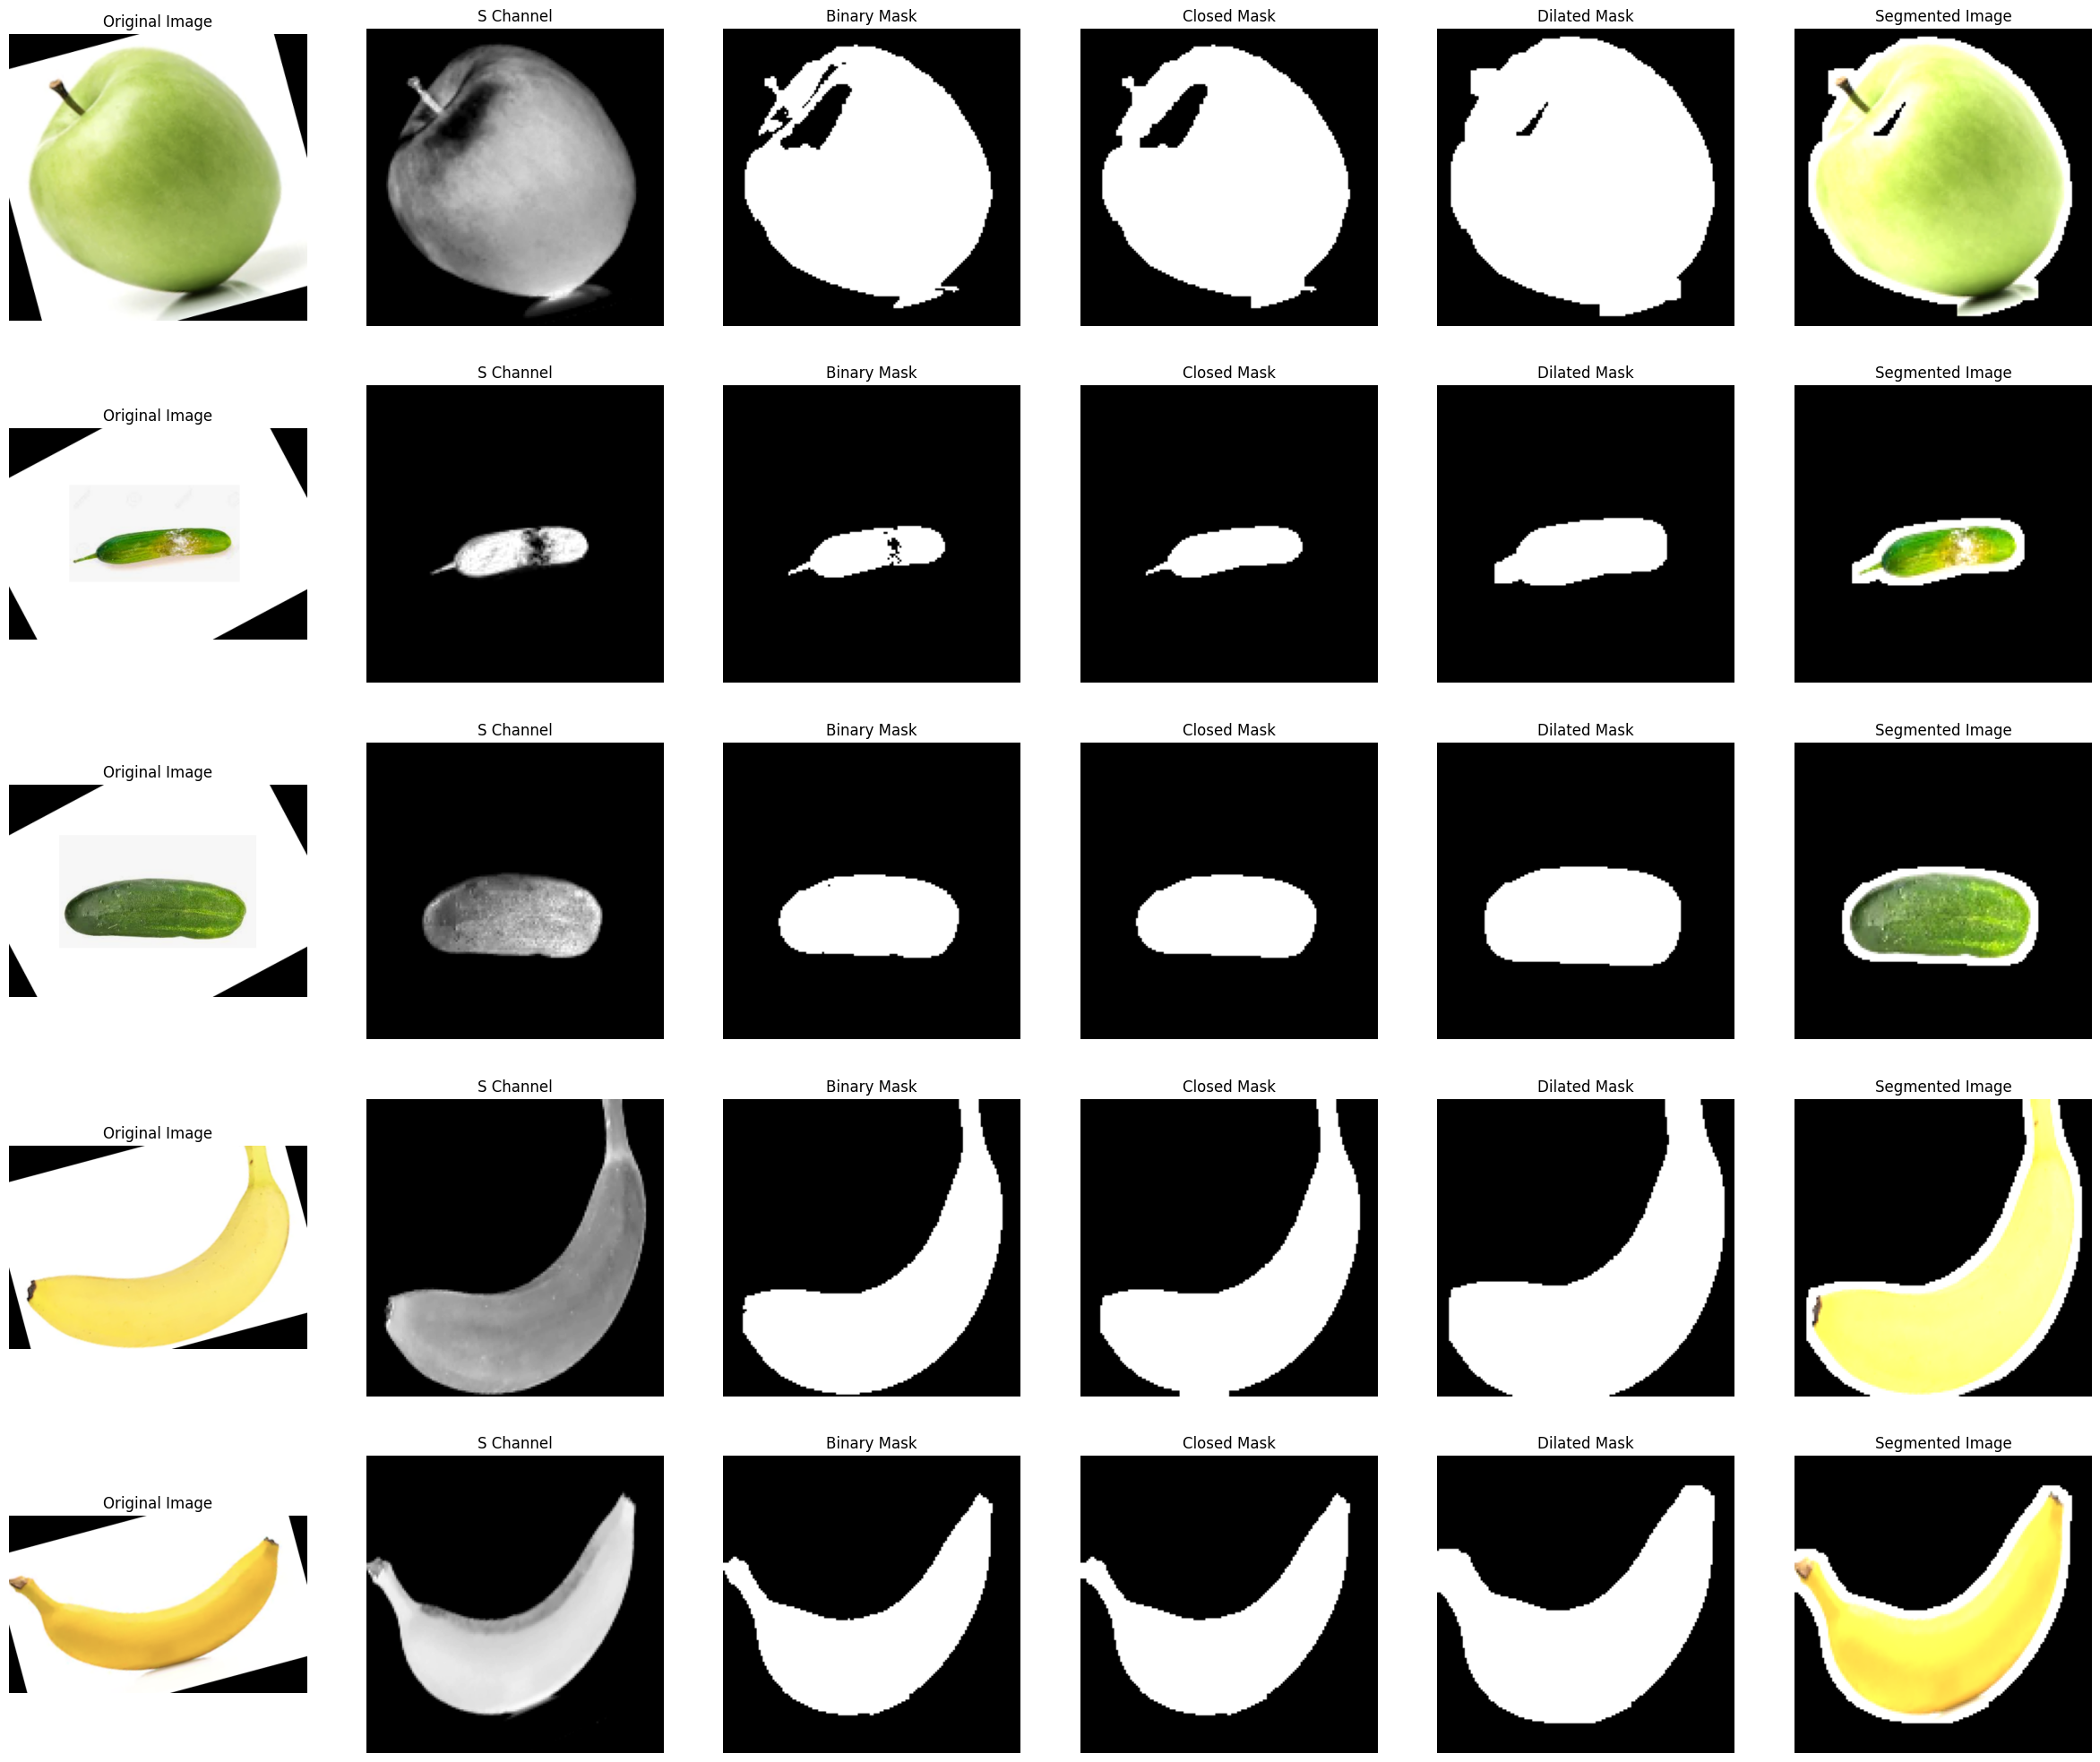

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Keep a copy of the original for comparison
    enhanced = cv2.convertScaleAbs(original, alpha=1.3, beta=0)  # Adjusted contrast enhancement
    resized = cv2.resize(enhanced, (150, 150))  # Resize Image
    hsv_image = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)  # Convert RGB to HSV
    s_channel = hsv_image[:, :, 1]  # Using the 'S' channel for thresholding
    _, thresholded = cv2.threshold(s_channel, 50, 255, cv2.THRESH_BINARY)  # Background Removal and Thresholding

    # Apply morphological closing then dilation to fill small holes
    kernel = np.ones((5, 5), np.uint8)
    closed_mask = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    dilated_mask = cv2.dilate(closed_mask, kernel, iterations=2)  # Dilation to fill gaps

    segmented_image = cv2.bitwise_and(resized, resized, mask=dilated_mask)  # Apply the refined mask to the RGB image
    processed = segmented_image.astype('uint8')  # Convert back to uint8 for display
    return s_channel, thresholded, closed_mask, dilated_mask, processed, original

def display_images(base_dir, num_images=5):
    file_paths = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_paths.append(os.path.join(root, file))
    file_paths = np.random.choice(file_paths, size=min(num_images, len(file_paths)), replace=False)

    fig, axs = plt.subplots(num_images, 6, figsize=(30, num_images * 5))  # Six columns for different image stages
    for i, file_path in enumerate(file_paths):
        image = cv2.imread(file_path)
        s_channel, binary_mask, closed_mask, dilated_mask, processed, original = preprocess_image(image)
        axs[i, 0].imshow(original)
        axs[i, 0].set_title('Original Image')
        axs[i, 0].axis('off')

        axs[i, 1].imshow(s_channel, cmap='gray')
        axs[i, 1].set_title('S Channel')
        axs[i, 1].axis('off')

        axs[i, 2].imshow(binary_mask, cmap='gray')
        axs[i, 2].set_title('Binary Mask')
        axs[i, 2].axis('off')

        axs[i, 3].imshow(closed_mask, cmap='gray')
        axs[i, 3].set_title('Closed Mask')
        axs[i, 3].axis('off')

        axs[i, 4].imshow(dilated_mask, cmap='gray')
        axs[i, 4].set_title('Dilated Mask')
        axs[i, 4].axis('off')

        axs[i, 5].imshow(processed)
        axs[i, 5].set_title('Segmented Image')
        axs[i, 5].axis('off')
    plt.show()

def process_and_save_images(base_dir, output_base_dir):
    if not os.path.exists(output_base_dir):
        os.makedirs(output_base_dir)

    for root, dirs, files in os.walk(base_dir):
        for dir_name in dirs:
            input_dir = os.path.join(root, dir_name)
            output_dir = input_dir.replace(base_dir, output_base_dir)
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            for file in os.listdir(input_dir):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    file_path = os.path.join(input_dir, file)
                    image = cv2.imread(file_path)
                    _, _, _, _, processed, original = preprocess_image(image)
                    output_path = os.path.join(output_dir, file)
                    cv2.imwrite(output_path, cv2.cvtColor(processed, cv2.COLOR_RGB2BGR))

# Set the base directory to the location of your dataset
base_dir = '/content/Original_Sipllited_Data'
output_base_dir = '/content/Enhanced_Sipllited_Data'

# Process and save images
process_and_save_images(base_dir, output_base_dir)
# Display images from the original directory to verify preprocessing
display_images(base_dir)

In [3]:
import zipfile
from google.colab import files as colab_files

def zip_directory(directory, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for root, _, files in os.walk(directory):
            for file in files:
                zipf.write(os.path.join(root, file), arcname=os.path.relpath(os.path.join(root, file), directory))

    colab_files.download(zip_filename)

# Zip the processed images directory
zip_filename = 'Enhanced_Sipllited_Data.zip'
zip_directory('/content/Enhanced_Sipllited_Data', zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>